## Spacy

spacy is open source  library for NLP in python.

Some Feature

- `Tokenization` : split text into words, pancutation mark etc.
- `Part-of-Speech Tagging` : assign grammertical label to each token.
- `Named Entity Recognition (NER)` - spacy can identify named entity in text. such as people name, ORG name
- `Dependency Parsing` - Dependency parsing is the process of extracting the dependency parse of a sentence to represent its grammatical structure. 
- `Lemmatization` - transform word into root word is called a lemma
- `Sentence Boundary Detection(SBD)` - finding and segmenting individual sentence
- `Entity Linking (EL)` - 
- `Similarity` - Comparing word, text span and document and how they similar to each other
- `Eule-based matching1` - 
- `Training` -

In [2]:
import spacy

In [3]:
nlp = spacy.load("en_core_web_sm")

## Tokenization

In [3]:
text = "spaCy is an open-source software library for advanced natural language processing"
for i in nlp(text):
    print(i.text)

spaCy
is
an
open
-
source
software
library
for
advanced
natural
language
processing


## Part-of-Speech Tagging
assign grammertical label to each token.

https://universaldependencies.org/u/pos/

`tag_` represents the detailed part-of-speech tag assigned to the token, which includes more specific information about the word's grammatical properties. EX - "NN" for a noun or "VB" for a verb.

`pos_` it provides more general categorization of the word part of speech. ex - NOUN 

In [14]:
import pandas as pd
text = "spaCy is an open-source software library for advanced natural language processing"
l =[]
for token in nlp(text):
    l.append([token.text,token.pos_,token.tag_,spacy.explain(token.tag_),token.dep_, token.shape_, token.is_alpha])
    #print(token.text,'->',token.pos_,'->',token.tag_,spacy.explain(token.tag_),token.dep_, token.shape_, token.is_alpha)
pd.DataFrame(l,columns = ['tect','pos_','tag_','explain_tag','dep_','shape_','is_alpha'])    

,tect,pos_,tag_,explain_tag,dep_,shape_,is_alpha
0,spaCy,INTJ,UH,interjection,nsubj,xxxXx,True
1,is,AUX,VBZ,"verb, 3rd person singular present",ROOT,xx,True
2,an,DET,DT,determiner,det,xx,True
3,open,ADJ,JJ,"adjective (English), other noun-modifier (Chin...",amod,xxxx,True
4,-,PUNCT,HYPH,"punctuation mark, hyphen",punct,-,False
5,source,NOUN,NN,"noun, singular or mass",compound,xxxx,True
6,software,NOUN,NN,"noun, singular or mass",compound,xxxx,True
7,library,NOUN,NN,"noun, singular or mass",attr,xxxx,True
8,for,ADP,IN,"conjunction, subordinating or preposition",prep,xxx,True
9,advanced,ADJ,JJ,"adjective (English), other noun-modifier (Chin...",amod,xxxx,True


## Dependency Parsing

It analyzes the syntactic structure of a sentence and assigns grammatical relationships between words, creating a parse tree representation

In [16]:
from spacy import displacy

In [20]:
text = "spaCy is an open-source software library for advanced natural language processing"
doc = nlp(text)
options = {"compact":True, "distance":100, "bg":"#0095b6", "color":"#DDDDDD", "font":"Source Sans Pro"}
displacy.render(doc, style='dep', jupyter=True,)

## Sentence Boundary Detection(SBD)
finding start and end of the sentence

In [24]:
sent = "Processing raw text intelligently is difficult: most words are rare, and it’s common for words that look completely different to mean almost the same thing. The same words in a different order can mean something completely different. Even splitting text into useful word-like units can be difficult in many languages. "
doc = nlp(sent)
print("No of Sentence" , len(list(doc.sents)))
for i in doc.sents:
    print(i)

No of Sentence 3
Processing raw text intelligently is difficult: most words are rare, and it’s common for words that look completely different to mean almost the same thing.
The same words in a different order can mean something completely different.
Even splitting text into useful word-like units can be difficult in many languages.


## Lemmatization & Stemming
Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma

Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling

In [34]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ujjal\AppData\Roaming\nltk_data...


True

In [40]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
text = "spaCy is an open-source software library for advanced natural language processing"
st = PorterStemmer()
lema = WordNetLemmatizer()
for token in nlp(text):
    print(token.text,'->',st.stem(token.text),lema.lemmatize(token.text),token.lemma_)

spaCy -> spaci spaCy spacy
is -> is is be
an -> an an an
open -> open open open
- -> - - -
source -> sourc source source
software -> softwar software software
library -> librari library library
for -> for for for
advanced -> advanc advanced advanced
natural -> natur natural natural
language -> languag language language
processing -> process processing processing


## Named Entity Recognition (NER)

spaCy features an extremely fast statistical entity recognition system, that assigns labels to contiguous spans of tokens. The default trained pipelines can identify a variety of named and numeric entities, including companies, locations, organizations and products.

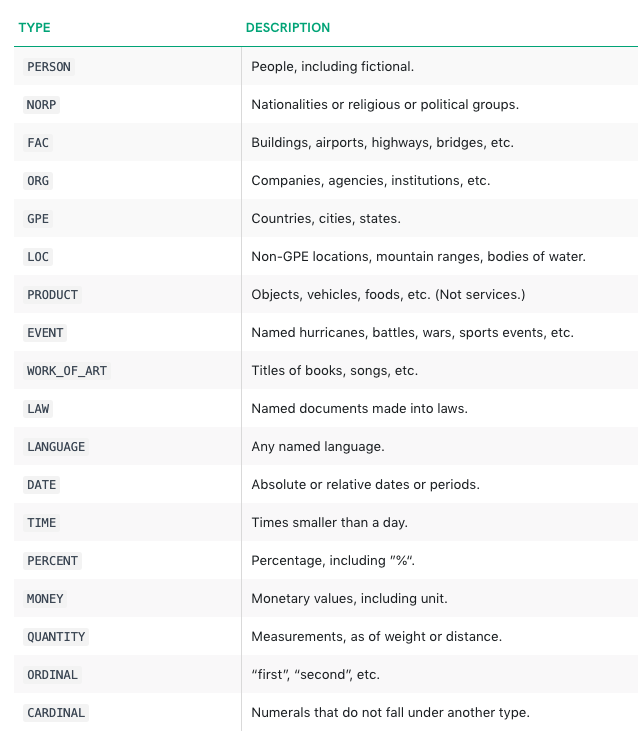

In [4]:
sent = """
We are looking for 8-10 years experienced DotNet Developer, JOB CODE - RDNLD2

Job Description

 Candidates with 8+ years of experience in IT industry and with strong .Net/.Net

Core/Azure Cloud Service/ Azure DevOps.

 Working hours – 8 hours , with a few hours of overlap during EST Time zone.

 Expertise in working with Microsoft Technologies like C#, .Net Core , WEB API,

ASP.Net MVC, ADO.Net, Entity Framework, IIS, Git

 Hands on experience in Azure development , worked on Azure Web application,

App Service, Azure Storage, Azure SQL database and Azure AD

 Expertise in Microsoft Azure Cloud Service , Application Insights, Azure

Monitoring, KeyVault and SQL Azure.

 Hands on experience in building and deploying applications by adopting Azure

DevOps practices such as Continuous Integration (CI) and Continuous

Deployment (CD) in runtime with Git, Docker, Kubernetes and managing Azure

Cloud Services.

 Expertise in RDBMS including MS SQL Server with thorough knowledge in writing

SQL queries, Stored Procedures, Views, Functions, Packages, Cursors &amp; tables

and objects types.

 Good knowledge of JavaScript, React JS, jQuery, Angular,, and other languages

 Knowledge of architectural styles and design patterns, , experience in designing

solutions

 Broad and extensive knowledge of the software development life cycle (SDLC)

with software development models like Agile, Scrum model, Jira models.

 Designing, developing and executing software solutions to address business

issues

 Strong debugging and problem-solving skills

 Manage, coordinate and support development team throughout the process

 Perform object-oriented programming, data modelling and database creation.

 Experience in Stakeholder Management (client facing roles)

 Excellent communication and organizational skills



﻿Responsibilities

 Develop high-quality software design and architecture

 Identify, prioritize and execute tasks in the software development life cycle

 Guide team to write reusable, testable, performant and efficient code

 Work with the team to define, design, and deliver on new features

 Lead by example by designing and implementing clean best-practices

maintainable code

 Experience in large scale software development.

Primary Skills

 Expertise in C#, .Net Core, Entity framework, EF core, Microservices, Azure Cloud

services, Azure DevOps

 Expertise in RDBMS including MS SQL Server with thorough knowledge in writing

SQL queries, Stored Procedures

Soft Skills

 Team Management

 Communication Skills

 Documentation skills

 Leadership and ownership quality

 Mentor junior team members



"""

In [5]:
#label is hash value
# sent = "spaCy is an open-source software library for advanced natural language processing"
# sent = "Apple is looking at buying San Francisco startup "
doc = nlp(sent)
for ent in doc.ents:
    print(ent.text,ent.label_,ent.start_char,ent.label)

8-10 years DATE 20 391
DotNet Developer ORG 43 383
8+ years DATE 115 391
Working hours TIME 223 392
8 hours TIME 239 392
a few hours TIME 254 392
EST Time LOC 284 385
Expertise GPE 302 384
Microsoft Technologies ORG 328 383
MVC ORG 390 383
Entity Framework PERSON 404 380
Git PERSON 427 380
Azure Storage ORG 524 383
Expertise GPE 574 384
Microsoft Azure Cloud Service ORG 587 383
KeyVault ORG 660 383
SQL Azure ORG 673 383
DevOps ORG 765 383
Continuous Integration ORG 790 383
CI ORG 814 383
Continuous

Deployment ORG 822 383
Git GPE 866 384
Docker GPE 871 384
Kubernetes ORG 879 383
Expertise GPE 929 384
MS SQL Server ORG 958 383
SQL ORG 1008 383
Stored Procedures PERSON 1021 380
Views ORG 1040 383
Functions PERSON 1047 380
Packages, Cursors & ORG 1058 383
JavaScript PRODUCT 1130 386
Broad ORG 1288 383
Agile ORG 1403 383
Jira PERSON 1423 380
Manage PRODUCT 1572 386
Stakeholder Management ORG 1738 383
Develop ORG 1860 383
Identify ORG 1917 383
Guide ORG 1998 383
Primary Skills PERSON 2278 3

In [9]:
from spacy import displacy
displacy.render(doc,style= "ent",jupyter=True )